In [979]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re            
from geopy.geocoders import Nominatim


In [980]:
df = pd.read_csv(r"E:\ny_housing_project\data\NY-House-Dataset.csv")
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [981]:
df.tail()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.0,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.0,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.0,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.0,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752
4800,Brokered by Nyc Realty Brokers Llc,Co-op for sale,349000,1,1.0,750.000000,460 Neptune Ave Apt 14O,"Brooklyn, NY 11224","460 Neptune Ave Apt 14OBrooklyn, NY 11224",New York,Kings County,Brooklyn,Coney Island,460,"460 Neptune Ave #14a, Brooklyn, NY 11224, USA",40.579147,-73.970949


In [982]:
df.shape

(4801, 17)

In [983]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [984]:

df = df.sort_values(['BEDS', 'BATH'], ascending=True)
df.head(28)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
8,Brokered by Pantiga Group Inc.,Co-op for sale,265000,1,1.0,750.000000,875 Morrison Ave Apt 3M,"Bronx, NY 10473","875 Morrison Ave Apt 3MBronx, NY 10473",Bronx County,The Bronx,East Bronx,Morrison Avenue,Parking lot,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089
18,Brokered by Coldwell Banker Realty,Co-op for sale,350000,1,1.0,700.000000,5800 Arlington Ave Apt 21A,"Bronx, NY 10471","5800 Arlington Ave Apt 21ABronx, NY 10471",New York,Bronx County,The Bronx,North Riverdale,5800,"5800 Arlington Ave Apt 21s, Bronx, NY 10471, USA",40.907370,-73.906558
23,Brokered by Martino Realty Group,Condo for sale,349900,1,1.0,651.000000,165 Cromwell Ave Apt 2B,"Staten Island, NY 10304","165 Cromwell Ave Apt 2BStaten Island, NY 10304",New York,Richmond County,Staten Island,Dongan Hills,165,"165 Cromwell Ave #2b, Staten Island, NY 10304,...",40.590206,-74.095803
26,"Brokered by Nest Seekers International, Long I...",Co-op for sale,325000,1,1.0,2184.207862,35-45 81st St Unit E1,"Queens, NY 11372","35-45 81st St Unit E1Queens, NY 11372",New York,Queens County,Queens,Jackson Heights,35-45,"35-45 81st St e1, Jackson Heights, NY 11372, USA",40.750508,-73.885136
28,Brokered by Du Chris Realty,Co-op for sale,230000,1,1.0,2184.207862,33-24 Junction Blvd Unit 6R,"Jackson Heights, NY 11372","33-24 Junction Blvd Unit 6RJackson Heights, NY...",United States,New York,Queens County,Queens,Junction Boulevard,"33-24 Junction Blvd, Jackson Heights, NY 11372...",40.755769,-73.873423
34,Brokered by H P Greenfield Real Estate Ltd,Co-op for sale,279000,1,1.0,750.000000,1801 Ocean Ave Apt 4A,"Brooklyn, NY 11230","1801 Ocean Ave Apt 4ABrooklyn, NY 11230",New York,Kings County,Brooklyn,Midwood,1801,"1801 Ocean Ave #4a, Brooklyn, NY 11230, USA",40.617916,-73.954630
35,Brokered by Ashford Homes LLC,Condo for sale,528000,1,1.0,602.000000,1238 63rd St Unit 432,"Brooklyn, NY 11219","1238 63rd St Unit 432Brooklyn, NY 11219",New York,Kings County,Brooklyn,Dyker Heights,1238,"1238 63rd St #432, Brooklyn, NY 11219, USA",40.627590,-74.001620
37,Brokered by E Realty International Corp,Co-op for sale,275000,1,1.0,2184.207862,44-55 Kissena Blvd Unit 5F,"Flushing, NY 11355","44-55 Kissena Blvd Unit 5FFlushing, NY 11355",New York,Queens County,Queens,Flushing,44-55,"44-55 Kissena Blvd #5f, Flushing, NY 11355, USA",40.752877,-73.821183
38,Brokered by Corcoran Park Slope,Condo for sale,1165000,1,1.0,815.000000,338 Berry St Apt 4E,"Brooklyn, NY 11249","338 Berry St Apt 4EBrooklyn, NY 11249",New York,Kings County,Brooklyn,Williamsburg,338,"338 Berry St #4e, Brooklyn, NY 11249, USA",40.711969,-73.964947
43,Brokered by Brown Harris Stevens,Co-op for sale,199900,1,1.0,2184.207862,828 Gerard Ave Apt 5F,"Bronx, NY 10451","828 Gerard Ave Apt 5FBronx, NY 10451",New York,Bronx County,The Bronx,Concourse,828,"828 Gerard Ave #5f, Bronx, NY 10451, USA",40.826035,-73.925663


In [985]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4801 entries, 8 to 1143
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME              

In [986]:
duplicates = df[df.duplicated()]
duplicates_all = df[df.duplicated(keep=False)]
duplicates_all


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
205,Brokered by Sotheby's International Realty - D...,Co-op for sale,269000,1,1.0,2184.207862,4901 Henry Hudson Pkwy W Apt 5F,"Bronx, NY 10471","4901 Henry Hudson Pkwy W Apt 5FBronx, NY 10471",New York,Bronx County,The Bronx,Hudson Hill,4901,"4901 Henry Hudson Pkwy W #5f, Bronx, NY 10471,...",40.896805,-73.908747
216,Brokered by Sotheby's International Realty - D...,Co-op for sale,269000,1,1.0,2184.207862,4901 Henry Hudson Pkwy W Apt 5F,"Bronx, NY 10471","4901 Henry Hudson Pkwy W Apt 5FBronx, NY 10471",New York,Bronx County,The Bronx,Hudson Hill,4901,"4901 Henry Hudson Pkwy W #5f, Bronx, NY 10471,...",40.896805,-73.908747
822,Brokered by Sotheby's International Realty - D...,Co-op for sale,549000,1,1.0,2184.207862,535 E 72nd St Apt 4A,"New York, NY 10021","535 E 72nd St Apt 4ANew York, NY 10021",New York,New York County,New York,Manhattan,535,"535 E 72nd St #4a, New York, NY 10021, USA",40.766222,-73.951634
827,Brokered by TREBACH REALTY INC,Co-op for sale,295000,1,1.0,2184.207862,3001 Henry Hudson Pkwy Apt 3I,"Bronx, NY 10463","3001 Henry Hudson Pkwy Apt 3IBronx, NY 10463",United States,New York,Bronx County,The Bronx,Henry Hudson Parkway,"3001 Henry Hudson Pkwy, Bronx, NY 10463, USA",40.883124,-73.916463
829,Brokered by Sotheby's International Realty - D...,Co-op for sale,549000,1,1.0,2184.207862,535 E 72nd St Apt 4A,"New York, NY 10021","535 E 72nd St Apt 4ANew York, NY 10021",New York,New York County,New York,Manhattan,535,"535 E 72nd St #4a, New York, NY 10021, USA",40.766222,-73.951634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Brokered by Brp Associates Inc,Multi-family home for sale,1499000,9,6.0,3519.000000,2619 Shore Pkwy,"Brooklyn, NY 11223","2619 Shore PkwyBrooklyn, NY 11223",United States,New York,Kings County,Brooklyn,Shore Parkway,"2619 Shore Pkwy, Brooklyn, NY 11223, USA",40.583514,-73.973890
1464,Brokered by RE MAX Edge,Multi-family home for sale,1850000,12,8.0,5250.000000,1727 E 14th St,"Brooklyn, NY 11229","1727 E 14th StBrooklyn, NY 11229",United States,New York,Kings County,Brooklyn,East 14th Street,"1727 E 14th St, Brooklyn, NY 11229, USA",40.607437,-73.958828
1467,Brokered by RE MAX Edge,Multi-family home for sale,1850000,12,8.0,5250.000000,1727 E 14th St,"Brooklyn, NY 11229","1727 E 14th StBrooklyn, NY 11229",United States,New York,Kings County,Brooklyn,East 14th Street,"1727 E 14th St, Brooklyn, NY 11229, USA",40.607437,-73.958828
4129,Brokered by Avenues - Headquarters,Townhouse for sale,1500000,14,7.0,6375.000000,797 Fairmount Pl Unit Building,"Bronx, NY 10460","797 Fairmount Pl Unit BuildingBronx, NY 10460",United States,New York,Bronx County,The Bronx,Fairmount Place,"797 Fairmount Pl, Bronx, NY 10460, USA",40.842657,-73.888417


In [987]:
df = df.drop_duplicates()

#### Xử lý cột BROKER

In [988]:
df['BROKERTITLE'] = df['BROKERTITLE'].apply(lambda row: row.removeprefix("Brokered by"))
df['TYPE'] = df['TYPE'].apply(lambda row: row.removesuffix("for sale"))
df.head()


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
8,Pantiga Group Inc.,Co-op,265000,1,1.0,750.000000,875 Morrison Ave Apt 3M,"Bronx, NY 10473","875 Morrison Ave Apt 3MBronx, NY 10473",Bronx County,The Bronx,East Bronx,Morrison Avenue,Parking lot,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089
18,Coldwell Banker Realty,Co-op,350000,1,1.0,700.000000,5800 Arlington Ave Apt 21A,"Bronx, NY 10471","5800 Arlington Ave Apt 21ABronx, NY 10471",New York,Bronx County,The Bronx,North Riverdale,5800,"5800 Arlington Ave Apt 21s, Bronx, NY 10471, USA",40.907370,-73.906558
23,Martino Realty Group,Condo,349900,1,1.0,651.000000,165 Cromwell Ave Apt 2B,"Staten Island, NY 10304","165 Cromwell Ave Apt 2BStaten Island, NY 10304",New York,Richmond County,Staten Island,Dongan Hills,165,"165 Cromwell Ave #2b, Staten Island, NY 10304,...",40.590206,-74.095803
26,"Nest Seekers International, Long Island",Co-op,325000,1,1.0,2184.207862,35-45 81st St Unit E1,"Queens, NY 11372","35-45 81st St Unit E1Queens, NY 11372",New York,Queens County,Queens,Jackson Heights,35-45,"35-45 81st St e1, Jackson Heights, NY 11372, USA",40.750508,-73.885136
28,Du Chris Realty,Co-op,230000,1,1.0,2184.207862,33-24 Junction Blvd Unit 6R,"Jackson Heights, NY 11372","33-24 Junction Blvd Unit 6RJackson Heights, NY...",United States,New York,Queens County,Queens,Junction Boulevard,"33-24 Junction Blvd, Jackson Heights, NY 11372...",40.755769,-73.873423


In [989]:
print("Số unique BROKERTITLE ban đầu:", df['BROKERTITLE'].nunique())
print(df['BROKERTITLE'].value_counts().head(30))  

Số unique BROKERTITLE ban đầu: 1036
BROKERTITLE
 COMPASS                                                           435
 Douglas Elliman - 575 Madison Ave                                 109
 Brown Harris Stevens                                               93
 Corcoran East Side                                                 86
 RE MAX Edge                                                        75
 Winzone Realty Inc                                                 64
 Sotheby's International Realty - East Side Manhattan Brokerage     59
 E Realty International Corp                                        58
 Serhant                                                            49
 RE MAX Real Estate Professionals                                   48
 Exp Realty                                                         46
 EXP Realty                                                         44
 Sotheby's International Realty - Downtown Manhattan                40
 Corcoran Chelsea/Flatiron   

In [990]:
df['BROKERTITLE'] = df['BROKERTITLE'].str.lower().str.strip()
df['BROKERTITLE'] = df['BROKERTITLE'].str.replace(r'\s+', ' ', regex=True)
df['BROKERTITLE'] = (
    df['BROKERTITLE']
    .str.lower()
    .str.replace(r'[^a-z0-9 ]', ' ', regex=True)  # bỏ ký tự đặc biệt
    .str.replace(r'\s+', ' ', regex=True)         # bỏ khoảng trắng thừa
    .str.strip()
)
print("Số unique sau normalize:", df['BROKERTITLE'].nunique())
print(df['BROKERTITLE'].value_counts().head(10))

Số unique sau normalize: 995
BROKERTITLE
compass                                                         436
douglas elliman 575 madison ave                                 109
brown harris stevens                                             93
exp realty                                                       91
re max edge                                                      87
corcoran east side                                               86
winzone realty inc                                               64
robert defalco realty inc                                        63
sotheby s international realty east side manhattan brokerage     59
e realty international corp                                      58
Name: count, dtype: int64


In [991]:
# Loại bỏ hậu tố
df['BROKERTITLE'] = df['BROKERTITLE'].str.replace(r' - .*$| inc\.| llc| realty| brokered by |properties|group|associates|international|entry\.com|edge|side', '', regex=True).str.strip()

# Kiểm tra sau loại hậu tố
print("Số unique sau loại hậu tố:", df['BROKERTITLE'].nunique())
print(df['BROKERTITLE'].value_counts().head(10))

Số unique sau loại hậu tố: 987
BROKERTITLE
compass                                 436
douglas elliman 575 madison ave         109
brown harris stevens                     93
exp                                      92
re max                                   87
corcoran east                            86
winzone inc                              64
robert defalco inc                       63
sotheby s  east  manhattan brokerage     59
e  corp                                  58
Name: count, dtype: int64


In [992]:
# # Lấy unique values
# unique_brokers = df['BROKERTITLE_CLEAN'].unique()
# broker_map = {}
# for broker in unique_brokers:
#     match = process.extractOne(broker, unique_brokers, score_cutoff=80)  # 80% giống coi là cùng
#     if match:
#         broker_map[broker] = match[0]

# # Áp dụng map
# df['BROKERTITLE_CLEAN'] = df['BROKERTITLE_CLEAN'].map(broker_map).fillna(df['BROKERTITLE_CLEAN'])

# # Kiểm tra sau fuzzy
# print("Số unique sau fuzzy:", df['BROKERTITLE_CLEAN'].nunique())
# print(df['BROKERTITLE_CLEAN'].value_counts().head(30))

In [993]:
brand_map = {
    'corcoran': 'corcoran',
    'douglas elliman': 'douglas elliman',
    'compass': 'compass',
    'sotheby': "sotheby's",
    're max': 're/max',
    'keller williams': 'keller williams',
    'coldwell banker': 'coldwell banker',
    'brown harris stevens': 'brown harris stevens',
    'exp': 'exp',
    'serhant': 'serhant'
}
def map_brand(name):
    for k, v in brand_map.items():
        if k in name:
            return v
    return name

df['BROKERTITLE'] = df['BROKERTITLE'].apply(map_brand)
print("Số unique sau brand mapping:", df['BROKERTITLE'].nunique())
print(df['BROKERTITLE'].value_counts().head(50))


Số unique sau brand mapping: 865
BROKERTITLE
compass                                453
corcoran                               356
douglas elliman                        293
re/max                                 272
keller williams                        216
brown harris stevens                   164
sotheby's                              125
exp                                    118
coldwell banker                         75
winzone inc                             64
robert defalco inc                      63
e  corp                                 58
serhant                                 50
sowae corp                              37
nobroker                                33
nest seekers  midtown                   31
momentum real estate                    28
charles rutenberg inc                   21
neuhaus inc                             21
century homes                           20
ditommaso real estate                   19
bergen basin                            18
trebach i

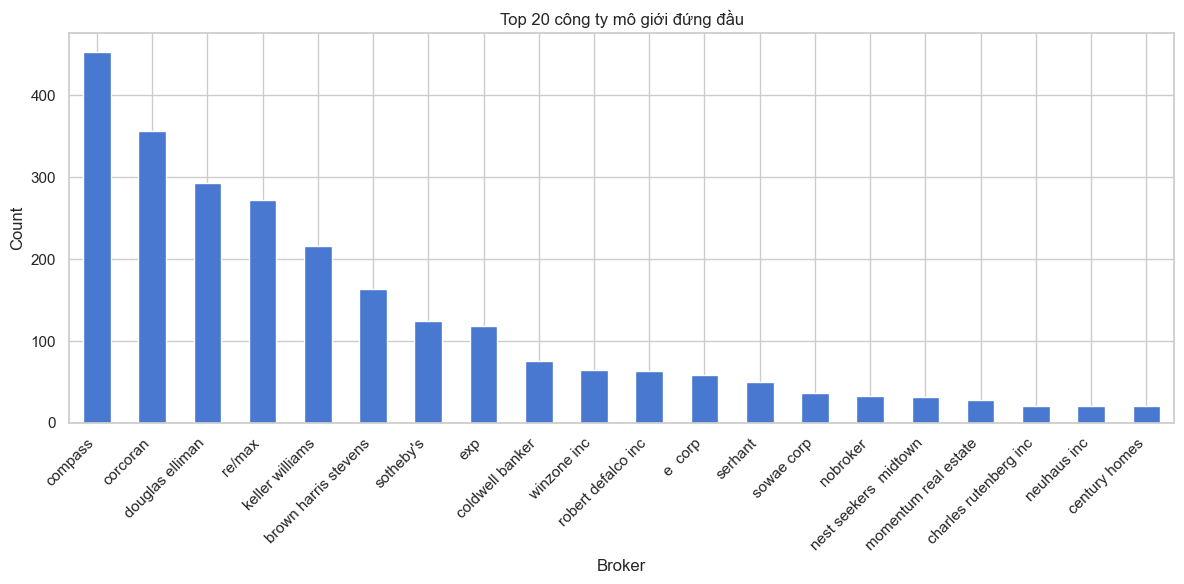

In [994]:
top_brokers = df['BROKERTITLE'].value_counts().head(20)

# Vẽ bar chart
plt.figure(figsize=(12,6))
top_brokers.plot(kind='bar')

plt.title("Top 20 công ty mô giới đứng đầu")
plt.xlabel("Broker")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [995]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
8,pantiga inc,Co-op,265000,1,1.0,750.000000,875 Morrison Ave Apt 3M,"Bronx, NY 10473","875 Morrison Ave Apt 3MBronx, NY 10473",Bronx County,The Bronx,East Bronx,Morrison Avenue,Parking lot,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089
18,coldwell banker,Co-op,350000,1,1.0,700.000000,5800 Arlington Ave Apt 21A,"Bronx, NY 10471","5800 Arlington Ave Apt 21ABronx, NY 10471",New York,Bronx County,The Bronx,North Riverdale,5800,"5800 Arlington Ave Apt 21s, Bronx, NY 10471, USA",40.907370,-73.906558
23,martino,Condo,349900,1,1.0,651.000000,165 Cromwell Ave Apt 2B,"Staten Island, NY 10304","165 Cromwell Ave Apt 2BStaten Island, NY 10304",New York,Richmond County,Staten Island,Dongan Hills,165,"165 Cromwell Ave #2b, Staten Island, NY 10304,...",40.590206,-74.095803
26,nest seekers long island,Co-op,325000,1,1.0,2184.207862,35-45 81st St Unit E1,"Queens, NY 11372","35-45 81st St Unit E1Queens, NY 11372",New York,Queens County,Queens,Jackson Heights,35-45,"35-45 81st St e1, Jackson Heights, NY 11372, USA",40.750508,-73.885136
28,du chris,Co-op,230000,1,1.0,2184.207862,33-24 Junction Blvd Unit 6R,"Jackson Heights, NY 11372","33-24 Junction Blvd Unit 6RJackson Heights, NY...",United States,New York,Queens County,Queens,Junction Boulevard,"33-24 Junction Blvd, Jackson Heights, NY 11372...",40.755769,-73.873423


#### Xử lý cột TYPE

In [996]:
df['TYPE'] = (
    df['TYPE']
    .str.lower()
    .str.strip()
    .str.replace(r'[-/]', ' ', regex=True)
)
df['TYPE'].value_counts()

TYPE
co op                1388
house                 966
condo                 842
multi family home     699
townhouse             288
pending               229
contingent             87
land                   47
for sale               20
foreclosure            14
condop                  4
coming soon             2
mobile house            1
Name: count, dtype: int64

In [997]:
# Tách STATUS
df['STATUS'] = df['TYPE'].str.extract(r'(pending|for sale|sold|contingent|foreclosure|coming soon)', flags=re.IGNORECASE)[0].str.lower().fillna('unknown')

# Tách PROPERTY_TYPE (loại bỏ trạng thái)
df['PROPERTY_TYPE'] = df['TYPE'].str.replace(r'pending|for sale|sold|contingent|foreclosure|coming soon', '', regex=True, flags=re.IGNORECASE).str.strip().str.lower().fillna('unknown')

# Kiểm tra kết quả
print("Số unique STATUS:", df['STATUS'].nunique())
print(df['STATUS'].value_counts())
print("Số unique PROPERTY_TYPE:", df['PROPERTY_TYPE'].nunique())
print(df['PROPERTY_TYPE'].value_counts())
print(df[['TYPE', 'STATUS', 'PROPERTY_TYPE']].head(10))

Số unique STATUS: 6
STATUS
unknown        4235
pending         229
contingent       87
for sale         20
foreclosure      14
coming soon       2
Name: count, dtype: int64
Số unique PROPERTY_TYPE: 9
PROPERTY_TYPE
co op                1388
house                 966
condo                 842
multi family home     699
                      352
townhouse             288
land                   47
condop                  4
mobile house            1
Name: count, dtype: int64
     TYPE   STATUS PROPERTY_TYPE
8   co op  unknown         co op
18  co op  unknown         co op
23  condo  unknown         condo
26  co op  unknown         co op
28  co op  unknown         co op
34  co op  unknown         co op
35  condo  unknown         condo
37  co op  unknown         co op
38  condo  unknown         condo
43  co op  unknown         co op


In [998]:
# Chuẩn hóa PROPERTY_TYPE
df['PROPERTY_TYPE'] = df['PROPERTY_TYPE'].replace({
    'mobile house': 'mobile home',  # Sửa lỗi đánh máy
    'condop': 'condo'  # Gom vào condo
}).str.strip()
df.drop(columns=['TYPE'],inplace= True )
# Kiểm tra lại
print(df['PROPERTY_TYPE'].unique())
print(df['PROPERTY_TYPE'].value_counts())

['co op' 'condo' '' 'house' 'multi family home' 'townhouse' 'land'
 'mobile home']
PROPERTY_TYPE
co op                1388
house                 966
condo                 846
multi family home     699
                      352
townhouse             288
land                   47
mobile home             1
Name: count, dtype: int64


In [999]:
# Gán rỗng thành "other"
df.loc[df['PROPERTY_TYPE'] == '', 'PROPERTY_TYPE'] = 'other'

# Kiểm tra lại
print("Các giá trị unique sau xử lý rỗng:", df['PROPERTY_TYPE'].nunique())
print("Tần suất của PROPERTY_TYPE:\n", df['PROPERTY_TYPE'].value_counts())

Các giá trị unique sau xử lý rỗng: 8
Tần suất của PROPERTY_TYPE:
 PROPERTY_TYPE
co op                1388
house                 966
condo                 846
multi family home     699
other                 352
townhouse             288
land                   47
mobile home             1
Name: count, dtype: int64


In [1000]:
# Lọc tất cả các hàng có PROPERTY_TYPE = 'other'
df_other = df[df['PROPERTY_TYPE'] == 'other']
df_other


,BROKERTITLE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,STATUS,PROPERTY_TYPE
90,built by toll brothers,950000,1,1.0,621.000000,The Rockwell # 3A,"New York, NY 10025","The Rockwell # 3ANew York, NY 10025",United States,New York,New York County,New York,West 103rd Street,"218 W 103rd St, New York, NY 10025, USA",40.798658,-73.967904,for sale,other
140,hot homes,90000,1,1.0,660.000000,16 Mapleton Ave,"Staten Island, NY 10306","16 Mapleton AveStaten Island, NY 10306",United States,New York,Richmond County,Staten Island,Mapleton Avenue,"16 Mapleton Ave, Staten Island, NY 10306, USA",40.574451,-74.092945,pending,other
561,corcoran,529900,1,1.0,630.000000,175 Adams St Apt 10E,"Brooklyn, NY 11201","175 Adams St Apt 10EBrooklyn, NY 11201",New York,Kings County,Brooklyn,Downtown Brooklyn,175,"175 Adams St #10e, Brooklyn, NY 11201, USA",40.698571,-73.988191,pending,other
835,red door,249999,1,1.0,750.000000,3747 Amboy Rd Apt 2A,"Staten Island, NY 10308","3747 Amboy Rd Apt 2AStaten Island, NY 10308",New York,Richmond County,Staten Island,Great Kills,3747,"3747 Amboy Rd #2a, Staten Island, NY 10308, USA",40.552355,-74.145065,contingent,other
912,douglas elliman,1495000,1,1.0,814.000000,9 Dekalb Ave Unit 55D,"Brooklyn, NY 11201","9 Dekalb Ave Unit 55DBrooklyn, NY 11201",New York,Kings County,Brooklyn,Downtown Brooklyn,9,"9 Dekalb Ave #55, Brooklyn, NY 11201, USA",40.690385,-73.982534,pending,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,ideal,3850000,8,6.0,6200.000000,1121 E 22nd St,"Brooklyn, NY 11210","1121 E 22nd StBrooklyn, NY 11210",United States,New York,Kings County,Brooklyn,East 22nd Street,"1121 E 22nd St, Brooklyn, NY 11210, USA",40.624810,-73.953961,pending,other
2107,douglas elliman,36000000,8,10.0,16000.000000,12 E 79th St,"New York, NY 10075","12 E 79th StNew York, NY 10075",United States,New York,New York County,New York,East 79th Street,"12 E 79th St, New York, NY 10075, USA",40.776402,-73.962948,pending,other
2522,citi citi habitats inc ny,199999,9,3.0,2184.207862,429 Pennsylvania Ave,"Brooklyn, NY 11207","429 Pennsylvania AveBrooklyn, NY 11207",United States,New York,Kings County,Brooklyn,Pennsylvania Avenue,"429 Pennsylvania Ave, Brooklyn, NY 11207, USA",40.666792,-73.894205,pending,other
3316,coldwell banker,990000,11,9.0,6240.000000,269 Grafton St,"Brooklyn, NY 11212","269 Grafton StBrooklyn, NY 11212",United States,New York,Kings County,Brooklyn,Grafton Street,"269 Grafton St, Brooklyn, NY 11212, USA",40.661671,-73.917129,contingent,other


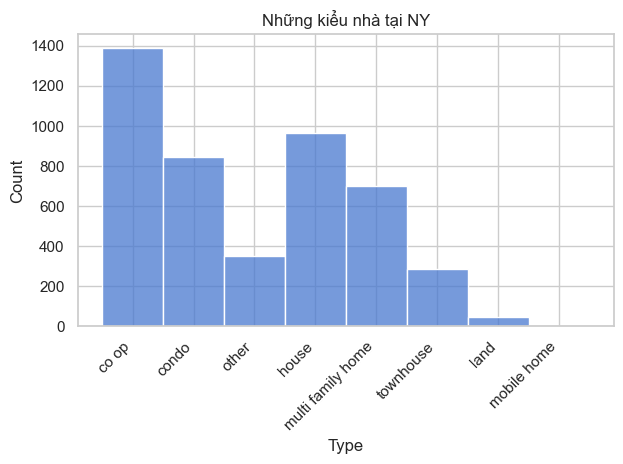

In [1001]:
sns.histplot(x= df['PROPERTY_TYPE'])

plt.title("Những kiểu nhà tại NY")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


#### Kiếm tra Missing Value

In [1002]:
df.isnull().sum()

BROKERTITLE                    0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
STATUS                         0
PROPERTY_TYPE                  0
dtype: int64

May mắn là không có giá trị null nào

### chuẩn hóa địa chỉ

In [1003]:
state_split = df['STATE'].str.extract(r'^(.*?),\s*([A-Z]{2})\s*(\d+)?$')

df['ZIP'] = state_split[2]
df = df.drop(
    columns=['STATE', 'ADDRESS', 'MAIN_ADDRESS', 
             'ADMINISTRATIVE_AREA_LEVEL_2', 'SUBLOCALITY', 'LONG_NAME']
)


borough_map = {
    'New York': 'Manhattan',
    'New York County': 'Manhattan',
    'Manhattan': 'Manhattan',
    'Brooklyn': 'Brooklyn',
    'Kings County': 'Brooklyn',
    'Queens': 'Queens',
    'Queens County': 'Queens',
    'Bronx': 'Bronx',
    'Bronx County': 'Bronx',
    'The Bronx': 'Bronx',
    'Staten Island': 'Staten Island',
    'Richmond County': 'Staten Island',
    'United States': np.nan,  # Lỗi
    'Flatbush': np.nan       # Neighborhood nhầm
}
df['BOROUGH'] = df['LOCALITY'].map(borough_map)
df = df.dropna(subset=['BOROUGH'])
df = df.drop(columns=['LOCALITY'])
print("Phân bố BOROUGH:\n", df['BOROUGH'].value_counts())

Phân bố BOROUGH:
 BOROUGH
Manhattan        3325
Queens            542
Brooklyn          448
Bronx             176
Staten Island      58
Name: count, dtype: int64


#### Xủ lý outlier

In [1004]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.549000e+03,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000
mean,2.390120e+06,3.362497,2.376743,2178.713524,40.714325,-73.941212
std,3.220160e+07,2.629799,1.972764,2290.637193,0.087506,0.101169
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639736,-73.987299
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726843,-73.948909
75%,1.498000e+06,4.000000,3.000000,2184.207862,40.771979,-73.868944
max,2.147484e+09,50.000000,50.000000,65535.000000,40.911772,-73.702450


In [1005]:
df = df[df['PRICE'] != 2147483647]


In [1006]:
df_clean = df.copy()

# Chuyển đổi kiểu dữ liệu số
df_clean['PRICE'] = pd.to_numeric(df_clean['PRICE'], errors='coerce')
df_clean['BEDS'] = pd.to_numeric(df_clean['BEDS'], errors='coerce')
df_clean['BATH'] = pd.to_numeric(df_clean['BATH'], errors='coerce')
df_clean['PROPERTYSQFT'] = pd.to_numeric(df_clean['PROPERTYSQFT'], errors='coerce')

df_clean = df_clean.dropna(subset=['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT'])
df_clean = df_clean[(df_clean['PRICE'] > 10000) & 
                    (df_clean['PROPERTYSQFT'] > 100) & 
                    (df_clean['BEDS'] > 0) & 
                    (df_clean['BATH'] > 0)]

# 2. Tạo cột PRICE_PER_SQFT
df_clean['PRICE_PER_SQFT'] = df_clean['PRICE'] / df_clean['PROPERTYSQFT']

# 3. Tạo cột LUXURY (chỉ 1 cột mới duy nhất!)
df_clean['LUXURY'] = (df_clean['PRICE'] >= 2000000) | (df_clean['PRICE_PER_SQFT'] >= 1000)



# 5. Phân tích nhanh đặc điểm nhà luxury
df_luxury = df_clean[df_clean['LUXURY']]
df_normal = df_clean[~df_clean['LUXURY']]

print("=== KẾT QUẢ PHÂN TÍCH NHANH ===")
print(f"Tổng số nhà: {len(df_clean)}")
print(f"Số nhà luxury: {len(df_luxury)}")
print(f"Số nhà thường: {len(df_normal)}")
print(f"\nSố phòng tắm trung bình:")
print(f"- Luxury: {df_luxury['BATH'].mean():.1f}")
print(f"- Thường: {df_normal['BATH'].mean():.1f}")
print(f"\nPhân bổ ở Manhattan:")
print(f"- Luxury: {(df_luxury['BOROUGH'].str.contains('Manhattan').sum() / len(df_luxury) * 100):.1f}%")
print(f"- Thường: {(df_normal['BOROUGH'].str.contains('Manhattan').sum() / len(df_normal) * 100):.1f}%")


=== KẾT QUẢ PHÂN TÍCH NHANH ===
Tổng số nhà: 4543
Số nhà luxury: 1065
Số nhà thường: 3478

Số phòng tắm trung bình:
- Luxury: 3.6
- Thường: 2.0

Phân bổ ở Manhattan:
- Luxury: 90.6%
- Thường: 67.7%


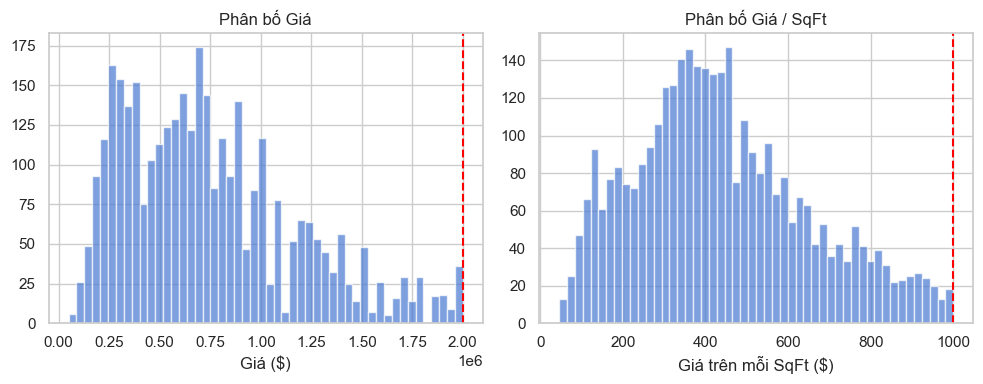

In [1007]:
# 4. Vẽ biểu đồ đơn giản để xác minh ngưỡng
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(df_normal['PRICE'], bins=50, alpha=0.7)
plt.axvline(2000000, color='red', linestyle='--')
plt.title('Phân bố Giá')
plt.xlabel('Giá ($)')

plt.subplot(1, 2, 2)
plt.hist(df_normal['PRICE_PER_SQFT'], bins=50, alpha=0.7)
plt.axvline(1000, color='red', linestyle='--')
plt.title('Phân bố Giá / SqFt')
plt.xlabel('Giá trên mỗi SqFt ($)')

plt.tight_layout()
plt.show()

In [1008]:
df_clean

,BROKERTITLE,PRICE,BEDS,BATH,PROPERTYSQFT,STREET_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,STATUS,PROPERTY_TYPE,ZIP,BOROUGH,PRICE_PER_SQFT,LUXURY
8,pantiga inc,265000,1,1.0,750.000000,Morrison Avenue,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089,unknown,co op,10473,Bronx,353.333333,False
18,coldwell banker,350000,1,1.0,700.000000,North Riverdale,"5800 Arlington Ave Apt 21s, Bronx, NY 10471, USA",40.907370,-73.906558,unknown,co op,10471,Bronx,500.000000,False
23,martino,349900,1,1.0,651.000000,Dongan Hills,"165 Cromwell Ave #2b, Staten Island, NY 10304,...",40.590206,-74.095803,unknown,condo,10304,Staten Island,537.480799,False
26,nest seekers long island,325000,1,1.0,2184.207862,Jackson Heights,"35-45 81st St e1, Jackson Heights, NY 11372, USA",40.750508,-73.885136,unknown,co op,11372,Queens,148.795362,False
28,du chris,230000,1,1.0,2184.207862,Queens,"33-24 Junction Blvd, Jackson Heights, NY 11372...",40.755769,-73.873423,unknown,co op,11372,Manhattan,105.301333,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,re/max,4380000,35,16.0,15000.000000,Brooklyn,"8699 Bay Pkwy #16, Brooklyn, NY 11214, USA",40.599715,-73.995694,unknown,multi family home,11214,Manhattan,292.000000,True
2488,re/max,3099000,36,16.0,12460.000000,Brooklyn,"5206 6th Ave, Brooklyn, NY 11220, USA",40.642652,-74.009674,unknown,multi family home,11220,Manhattan,248.715891,True
3276,weichert realtors tmt,5980000,40,20.0,15500.000000,Queens,"35-54 95th St, Flushing, NY 11372, USA",40.751468,-73.872619,unknown,multi family home,11372,Manhattan,385.806452,True
2653,neuhaus inc,10700000,42,43.0,27152.000000,Staten Island,"646 Port Richmond Ave, Staten Island, NY 10302...",40.627671,-74.142352,unknown,multi family home,10302,Manhattan,394.077784,True


In [1009]:
df_clean.sort_values(by='PRICE')

,BROKERTITLE,PRICE,BEDS,BATH,PROPERTYSQFT,STREET_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,STATUS,PROPERTY_TYPE,ZIP,BOROUGH,PRICE_PER_SQFT,LUXURY
463,morris park,49500,3,2.373861,800.000000,City Island,"150 City Island Ave #3e, Bronx, NY 10464, USA",40.843284,-73.784603,unknown,co op,10464,Bronx,61.875000,False
979,compass,60000,3,1.000000,445.000000,Manhattan,"2 E 55th St 809 35, New York, NY 10022, USA",40.761398,-73.974613,unknown,condo,10022,Manhattan,134.831461,False
188,all american management,65000,3,1.000000,230.000000,Manhattan,"45 Madison St #1, New York, NY 10038, USA",40.712070,-73.998326,for sale,other,10038,Manhattan,282.608696,False
3,compass,69000,3,1.000000,445.000000,New York,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,unknown,condo,10022,Manhattan,155.056180,False
252,besmatch real estate,69000,1,1.000000,850.000000,Highbridge,"1185 Anderson Ave #2e, Bronx, NY 10452, USA",40.836662,-73.923959,unknown,co op,10452,Bronx,81.176471,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,douglas elliman,55000000,8,8.000000,12000.000000,New York,"25 Riverside Dr, New York, NY 10023, USA",40.782238,-73.984632,unknown,house,10023,Manhattan,4583.333333,True
141,douglas elliman,56000000,11,10.000000,24000.000000,New York,"9 W 54th St, New York, NY 10019, USA",40.761600,-73.976191,unknown,house,10019,Manhattan,2333.333333,True
1075,compass,60000000,8,8.000000,2184.207862,Manhattan,"960 5th Ave #12, New York, NY 10075, USA",40.775642,-73.964247,unknown,co op,10075,Manhattan,27469.913026,True
69,sotheby's,65000000,3,2.373861,15200.000000,New York,"4 E 79th St, New York, NY 10075, USA",40.776561,-73.963317,unknown,townhouse,10075,Manhattan,4276.315789,True


In [1010]:
# df['PROPERTYSQFT'].describe()

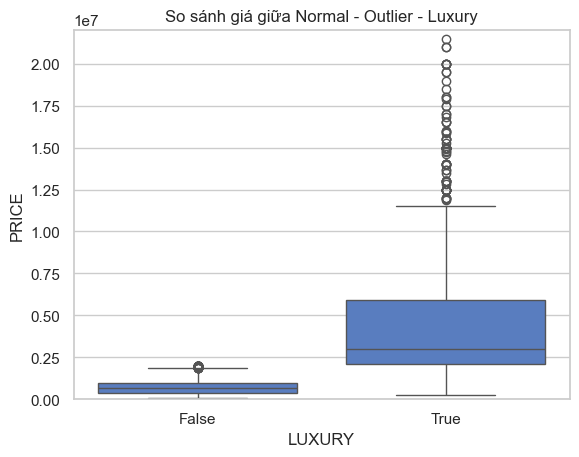

In [1011]:
sns.boxplot(x='LUXURY', y='PRICE', data=df_clean)
plt.ylim(0, df['PRICE'].quantile(0.99))  
plt.title("So sánh giá giữa Normal - Outlier - Luxury")
plt.show()


In [1012]:
df_luxury

,BROKERTITLE,PRICE,BEDS,BATH,PROPERTYSQFT,STREET_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,STATUS,PROPERTY_TYPE,ZIP,BOROUGH,PRICE_PER_SQFT,LUXURY
38,corcoran,1165000,1,1.0,815.000000,Williamsburg,"338 Berry St #4e, Brooklyn, NY 11249, USA",40.711969,-73.964947,unknown,condo,11249,Brooklyn,1429.447853,True
90,built by toll brothers,950000,1,1.0,621.000000,New York,"218 W 103rd St, New York, NY 10025, USA",40.798658,-73.967904,for sale,other,10025,Manhattan,1529.790660,True
202,compass,2250000,1,1.0,2184.207862,Manhattan,"302 W 12th St APT 7A, New York, NY 10014, USA",40.737308,-74.004667,unknown,condo,10014,Manhattan,1030.121738,True
287,signature premier,1025000,1,1.0,800.000000,Manhattan,"460 E 79th St #9f, New York, NY 10075, USA",40.771254,-73.950858,unknown,condo,10075,Manhattan,1281.250000,True
298,compass,1100000,1,1.0,726.000000,Manhattan,"88 Greenwich St APT 2307, New York, NY 10006, USA",40.707884,-74.014088,unknown,condo,10006,Manhattan,1515.151515,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,re/max,4380000,35,16.0,15000.000000,Brooklyn,"8699 Bay Pkwy #16, Brooklyn, NY 11214, USA",40.599715,-73.995694,unknown,multi family home,11214,Manhattan,292.000000,True
2488,re/max,3099000,36,16.0,12460.000000,Brooklyn,"5206 6th Ave, Brooklyn, NY 11220, USA",40.642652,-74.009674,unknown,multi family home,11220,Manhattan,248.715891,True
3276,weichert realtors tmt,5980000,40,20.0,15500.000000,Queens,"35-54 95th St, Flushing, NY 11372, USA",40.751468,-73.872619,unknown,multi family home,11372,Manhattan,385.806452,True
2653,neuhaus inc,10700000,42,43.0,27152.000000,Staten Island,"646 Port Richmond Ave, Staten Island, NY 10302...",40.627671,-74.142352,unknown,multi family home,10302,Manhattan,394.077784,True


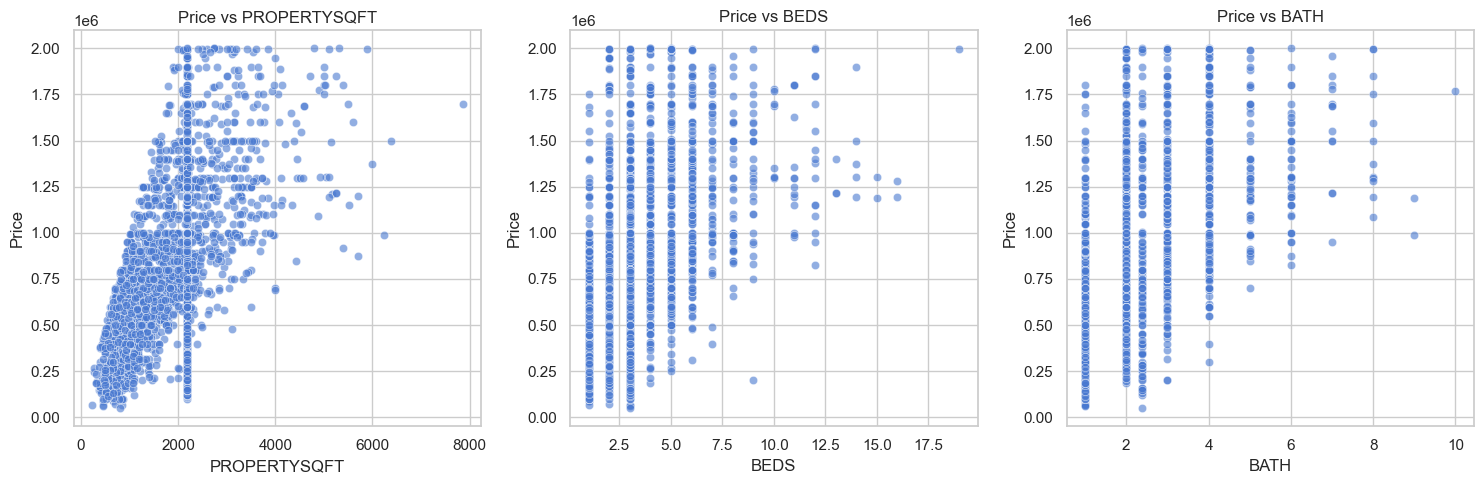

In [1013]:
sns.set(style="whitegrid", palette="muted")

# Các cột muốn so sánh với PRICE
cols = ["PROPERTYSQFT", "BEDS", "BATH"]

plt.figure(figsize=(15, 5))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=col, y="PRICE", data=df_normal, alpha=0.6)
    plt.title(f"Price vs {col}")
    plt.xlabel(col)
    plt.ylabel("Price")
    
plt.tight_layout()
plt.show()

In [1014]:
df_normal['PROPERTYSQFT'].value_counts()

PROPERTYSQFT
2184.207862    1319
750.000000       48
900.000000       48
800.000000       48
1200.000000      43
               ... 
3050.000000       1
1896.000000       1
2636.000000       1
3039.000000       1
5031.000000       1
Name: count, Length: 989, dtype: int64

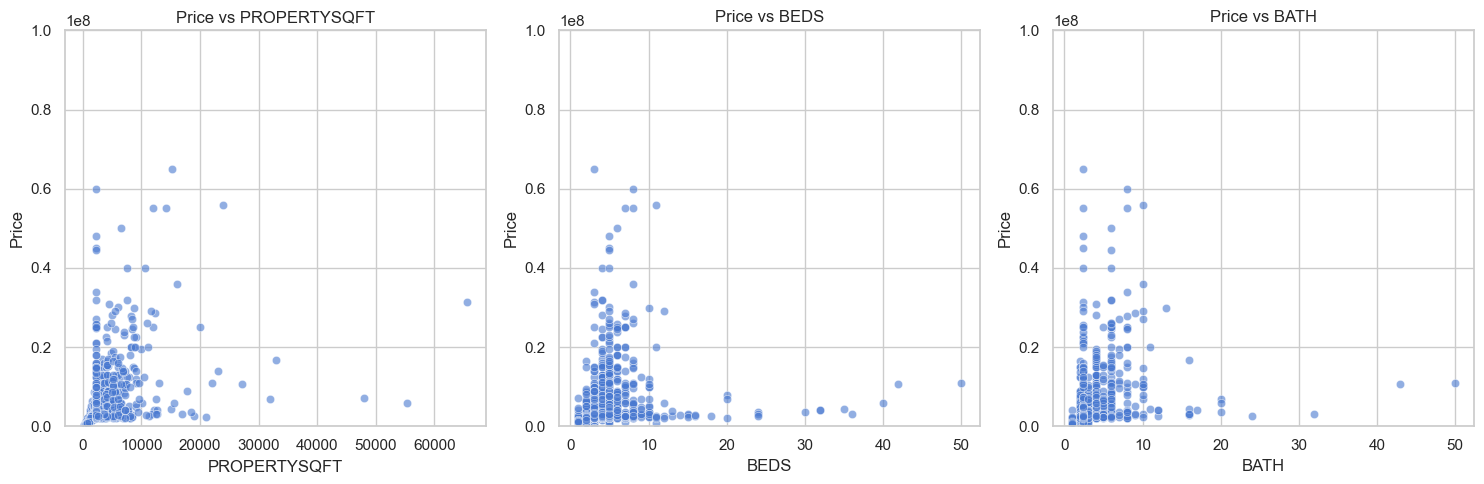

In [1015]:

# Các cột muốn so sánh với PRICE
cols = ["PROPERTYSQFT", "BEDS", "BATH"]

plt.figure(figsize=(15, 5))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=col, y="PRICE", data=df_luxury, alpha=0.6)
    plt.title(f"Price vs {col}")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.ylim(0, 1e8) 
    
plt.tight_layout()
plt.show()

- Diện tích là yếu tố quan trọng nhất đối với nhà thường, và vẫn là một trong các yếu tố với nhà luxury, nhưng luxury giá cao không phụ thuộc tuyến tính vào diện tích.

- Số phòng ngủ và phòng tắm chỉ là yếu tố phụ, không quyết định giá chính, đặc biệt với phân khúc luxury.

- Nhóm nhà thường chiếm đại đa số thị trường → dễ phân tích, dễ xây dựng mô hình định giá chuẩn.

- Luxury/outlier cần phân tích riêng → định giá dựa trên nhiều yếu tố khác ngoài số phòng và diện tích (vị trí, tiện ích, thiết kế, tiềm năng đầu tư).

- Có một số nhà nhỏ nhưng giá cao trong nhóm luxury → gợi ý yếu tố ngoài diện tích/số phòng, có thể là view, vị trí, hoặc thương hiệu chủ sở hữu.

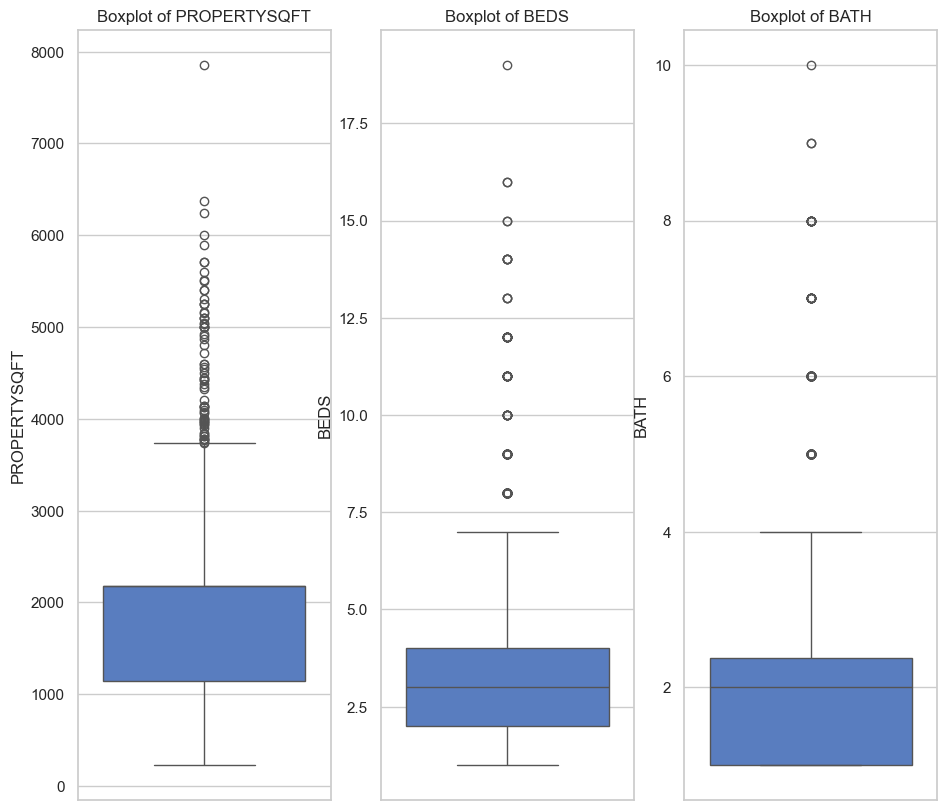

In [1016]:
# Box plots for each of the variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df_normal[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
               

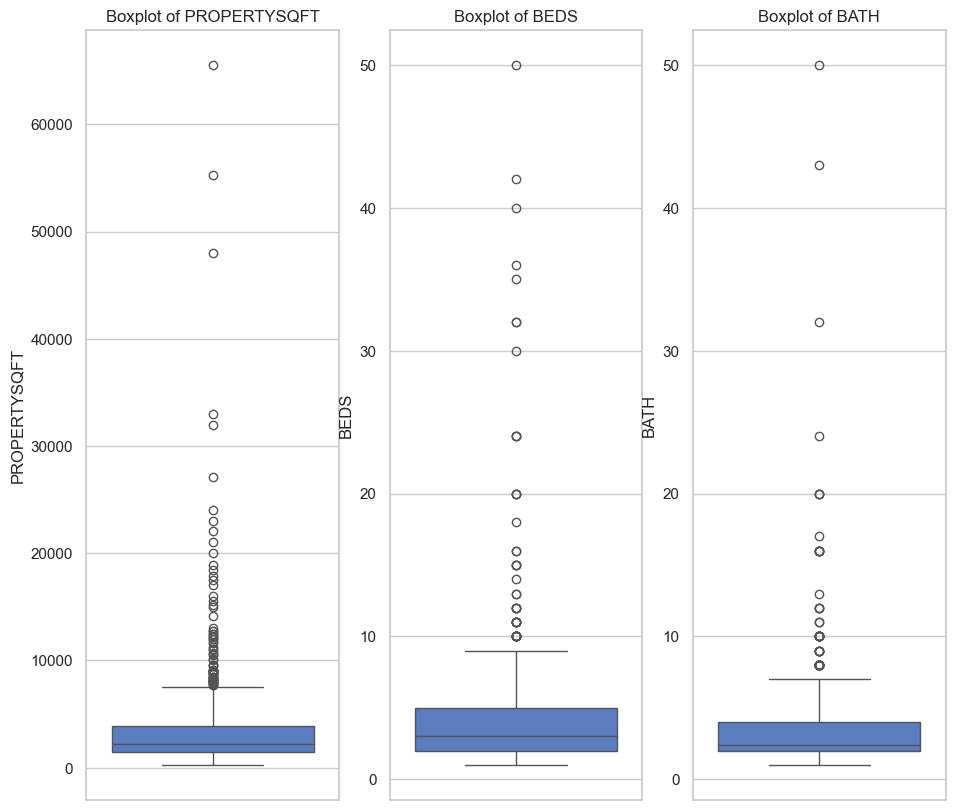

In [1017]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df_luxury[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
               

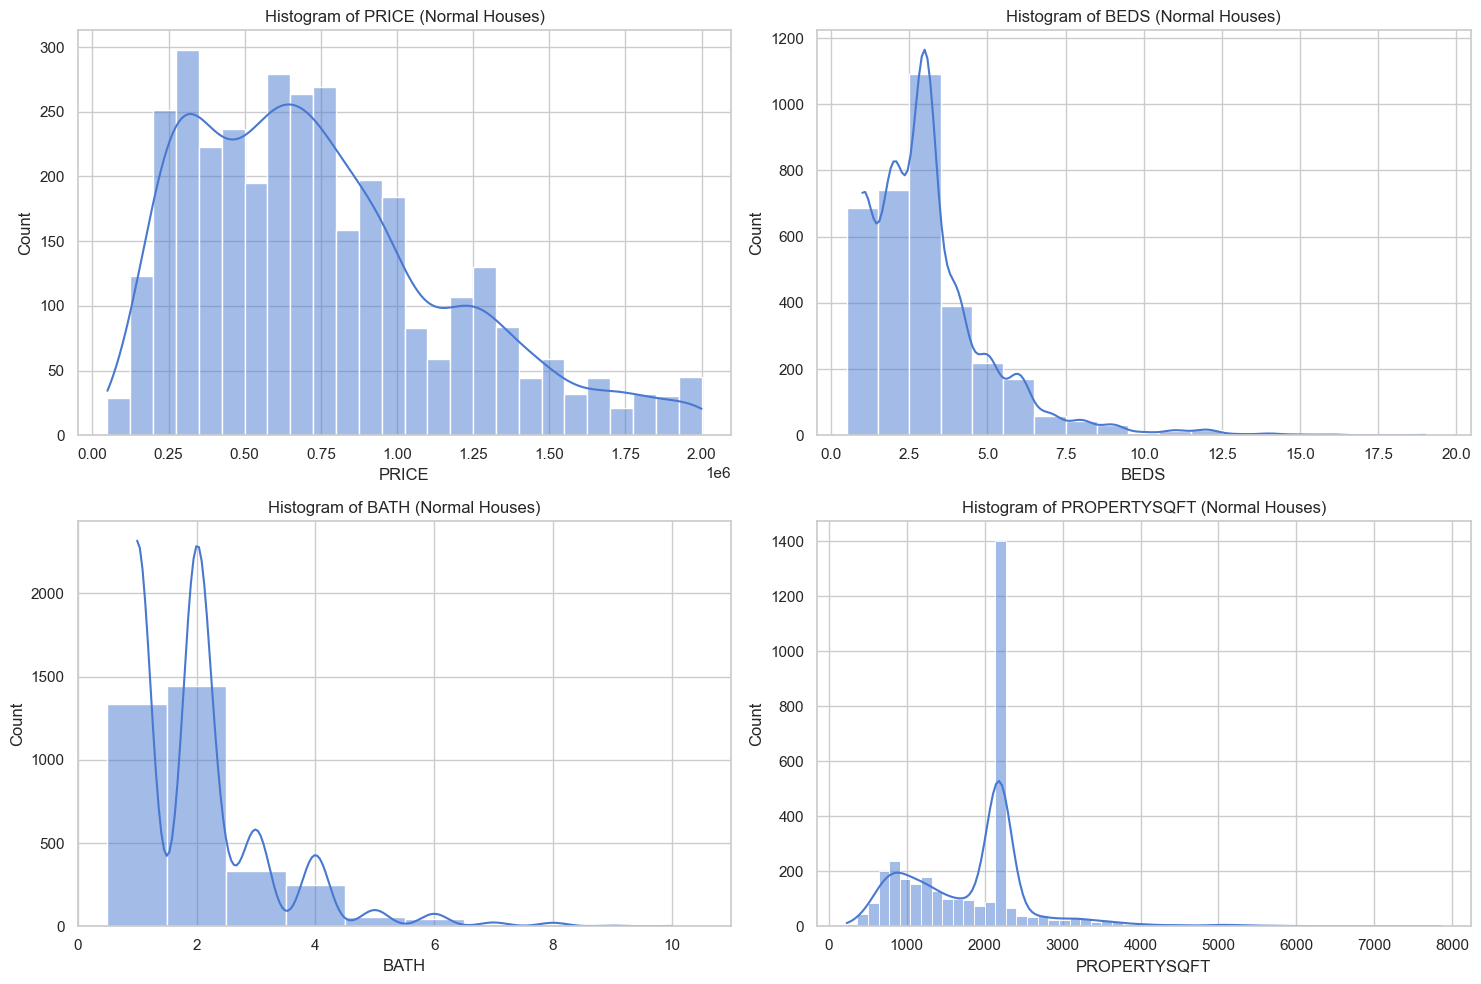

,PRICE,BEDS,BATH,PROPERTYSQFT
count,3.478000e+03,3478.000000,3478.000000,3478.000000
mean,7.496205e+05,3.088269,2.015039,1818.694126
std,4.305112e+05,1.983242,1.172650,804.344146
min,4.950000e+04,1.000000,1.000000,230.000000
25%,3.990000e+05,2.000000,1.000000,1150.000000
50%,6.800000e+05,3.000000,2.000000,2184.207862
75%,9.890000e+05,4.000000,2.373861,2184.207862
max,1.999999e+06,19.000000,10.000000,7854.000000


In [1018]:
# Descriptive statistics for normal houses (không luxury)
descriptive_stats_normal = df_normal[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']].describe()

# Visualizing the distributions with histograms (normal houses only)
plt.figure(figsize=(15, 10))

# Histogram for PRICE
plt.subplot(2, 2, 1)
sns.histplot(df_normal['PRICE'], kde=True)
plt.title('Histogram of PRICE (Normal Houses)')

# Histogram for BEDS
plt.subplot(2, 2, 2)
sns.histplot(df_normal['BEDS'], kde=True, discrete=True)
plt.title('Histogram of BEDS (Normal Houses)')

# Histogram for BATH
plt.subplot(2, 2, 3)
sns.histplot(df_normal['BATH'], kde=True, discrete=True)
plt.title('Histogram of BATH (Normal Houses)')

# Histogram for PROPERTYSQFT
plt.subplot(2, 2, 4)
sns.histplot(df_normal['PROPERTYSQFT'], kde=True)
plt.title('Histogram of PROPERTYSQFT (Normal Houses)')

plt.tight_layout()
plt.show()

descriptive_stats_normal


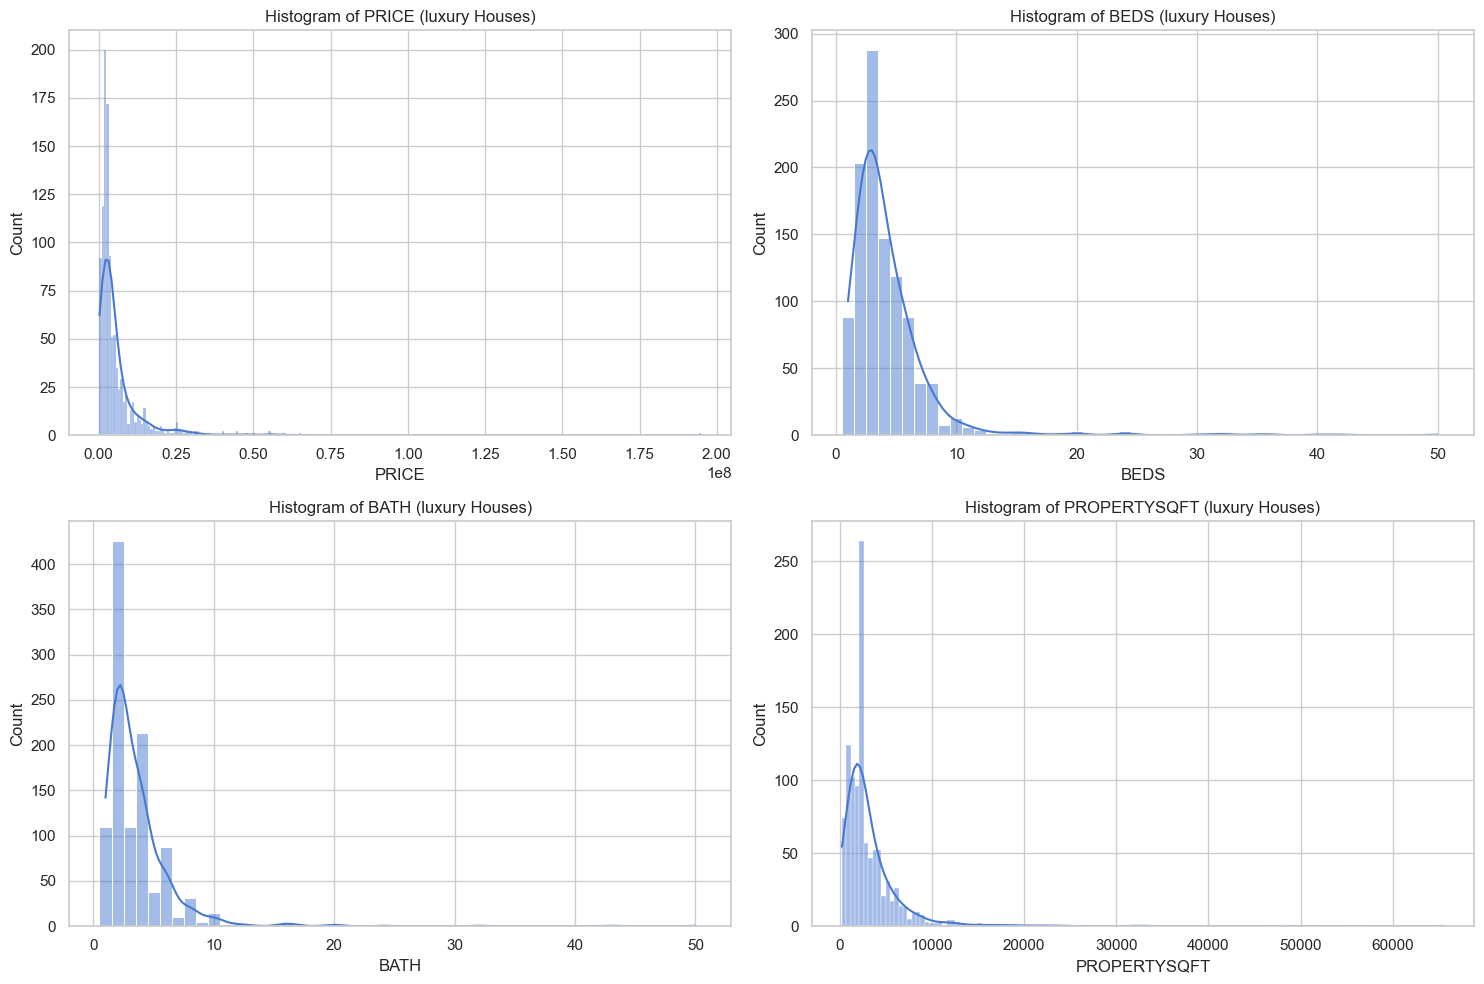

,PRICE,BEDS,BATH,PROPERTYSQFT
count,1.065000e+03,1065.000000,1065.000000,1065.000000
mean,5.729868e+06,4.257277,3.561619,3346.509690
std,9.325390e+06,3.955522,3.206579,4297.359441
min,2.500000e+05,1.000000,1.000000,246.000000
25%,2.088000e+06,2.000000,2.000000,1472.000000
50%,2.995000e+06,3.000000,2.373861,2184.207862
75%,5.925000e+06,5.000000,4.000000,3900.000000
max,1.950000e+08,50.000000,50.000000,65535.000000


In [1019]:
descriptive_stats_normal = df_luxury[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']].describe()

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df_luxury['PRICE'], kde=True)
plt.title('Histogram of PRICE (luxury Houses)')

plt.subplot(2, 2, 2)
sns.histplot(df_luxury['BEDS'], kde=True, discrete=True)
plt.title('Histogram of BEDS (luxury Houses)')

plt.subplot(2, 2, 3)
sns.histplot(df_luxury['BATH'], kde=True, discrete=True)
plt.title('Histogram of BATH (luxury Houses)')

plt.subplot(2, 2, 4)
sns.histplot(df_luxury['PROPERTYSQFT'], kde=True)
plt.title('Histogram of PROPERTYSQFT (luxury Houses)')

plt.tight_layout()
plt.show()

descriptive_stats_normal


In [1020]:
df

,BROKERTITLE,PRICE,BEDS,BATH,PROPERTYSQFT,STREET_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,STATUS,PROPERTY_TYPE,ZIP,BOROUGH
8,pantiga inc,265000,1,1.0,750.000000,Morrison Avenue,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089,unknown,co op,10473,Bronx
18,coldwell banker,350000,1,1.0,700.000000,North Riverdale,"5800 Arlington Ave Apt 21s, Bronx, NY 10471, USA",40.907370,-73.906558,unknown,co op,10471,Bronx
23,martino,349900,1,1.0,651.000000,Dongan Hills,"165 Cromwell Ave #2b, Staten Island, NY 10304,...",40.590206,-74.095803,unknown,condo,10304,Staten Island
26,nest seekers long island,325000,1,1.0,2184.207862,Jackson Heights,"35-45 81st St e1, Jackson Heights, NY 11372, USA",40.750508,-73.885136,unknown,co op,11372,Queens
28,du chris,230000,1,1.0,2184.207862,Queens,"33-24 Junction Blvd, Jackson Heights, NY 11372...",40.755769,-73.873423,unknown,co op,11372,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,re/max,4380000,35,16.0,15000.000000,Brooklyn,"8699 Bay Pkwy #16, Brooklyn, NY 11214, USA",40.599715,-73.995694,unknown,multi family home,11214,Manhattan
2488,re/max,3099000,36,16.0,12460.000000,Brooklyn,"5206 6th Ave, Brooklyn, NY 11220, USA",40.642652,-74.009674,unknown,multi family home,11220,Manhattan
3276,weichert realtors tmt,5980000,40,20.0,15500.000000,Queens,"35-54 95th St, Flushing, NY 11372, USA",40.751468,-73.872619,unknown,multi family home,11372,Manhattan
2653,neuhaus inc,10700000,42,43.0,27152.000000,Staten Island,"646 Port Richmond Ave, Staten Island, NY 10302...",40.627671,-74.142352,unknown,multi family home,10302,Manhattan


In [1021]:
df_clean

,BROKERTITLE,PRICE,BEDS,BATH,PROPERTYSQFT,STREET_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,STATUS,PROPERTY_TYPE,ZIP,BOROUGH,PRICE_PER_SQFT,LUXURY
8,pantiga inc,265000,1,1.0,750.000000,Morrison Avenue,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089,unknown,co op,10473,Bronx,353.333333,False
18,coldwell banker,350000,1,1.0,700.000000,North Riverdale,"5800 Arlington Ave Apt 21s, Bronx, NY 10471, USA",40.907370,-73.906558,unknown,co op,10471,Bronx,500.000000,False
23,martino,349900,1,1.0,651.000000,Dongan Hills,"165 Cromwell Ave #2b, Staten Island, NY 10304,...",40.590206,-74.095803,unknown,condo,10304,Staten Island,537.480799,False
26,nest seekers long island,325000,1,1.0,2184.207862,Jackson Heights,"35-45 81st St e1, Jackson Heights, NY 11372, USA",40.750508,-73.885136,unknown,co op,11372,Queens,148.795362,False
28,du chris,230000,1,1.0,2184.207862,Queens,"33-24 Junction Blvd, Jackson Heights, NY 11372...",40.755769,-73.873423,unknown,co op,11372,Manhattan,105.301333,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,re/max,4380000,35,16.0,15000.000000,Brooklyn,"8699 Bay Pkwy #16, Brooklyn, NY 11214, USA",40.599715,-73.995694,unknown,multi family home,11214,Manhattan,292.000000,True
2488,re/max,3099000,36,16.0,12460.000000,Brooklyn,"5206 6th Ave, Brooklyn, NY 11220, USA",40.642652,-74.009674,unknown,multi family home,11220,Manhattan,248.715891,True
3276,weichert realtors tmt,5980000,40,20.0,15500.000000,Queens,"35-54 95th St, Flushing, NY 11372, USA",40.751468,-73.872619,unknown,multi family home,11372,Manhattan,385.806452,True
2653,neuhaus inc,10700000,42,43.0,27152.000000,Staten Island,"646 Port Richmond Ave, Staten Island, NY 10302...",40.627671,-74.142352,unknown,multi family home,10302,Manhattan,394.077784,True


In [1022]:
# xóa do bị trộn cấp đường và quận
df_clean = df_clean.drop(columns='STREET_NAME')

In [1023]:
df

,BROKERTITLE,PRICE,BEDS,BATH,PROPERTYSQFT,STREET_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,STATUS,PROPERTY_TYPE,ZIP,BOROUGH
8,pantiga inc,265000,1,1.0,750.000000,Morrison Avenue,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089,unknown,co op,10473,Bronx
18,coldwell banker,350000,1,1.0,700.000000,North Riverdale,"5800 Arlington Ave Apt 21s, Bronx, NY 10471, USA",40.907370,-73.906558,unknown,co op,10471,Bronx
23,martino,349900,1,1.0,651.000000,Dongan Hills,"165 Cromwell Ave #2b, Staten Island, NY 10304,...",40.590206,-74.095803,unknown,condo,10304,Staten Island
26,nest seekers long island,325000,1,1.0,2184.207862,Jackson Heights,"35-45 81st St e1, Jackson Heights, NY 11372, USA",40.750508,-73.885136,unknown,co op,11372,Queens
28,du chris,230000,1,1.0,2184.207862,Queens,"33-24 Junction Blvd, Jackson Heights, NY 11372...",40.755769,-73.873423,unknown,co op,11372,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,re/max,4380000,35,16.0,15000.000000,Brooklyn,"8699 Bay Pkwy #16, Brooklyn, NY 11214, USA",40.599715,-73.995694,unknown,multi family home,11214,Manhattan
2488,re/max,3099000,36,16.0,12460.000000,Brooklyn,"5206 6th Ave, Brooklyn, NY 11220, USA",40.642652,-74.009674,unknown,multi family home,11220,Manhattan
3276,weichert realtors tmt,5980000,40,20.0,15500.000000,Queens,"35-54 95th St, Flushing, NY 11372, USA",40.751468,-73.872619,unknown,multi family home,11372,Manhattan
2653,neuhaus inc,10700000,42,43.0,27152.000000,Staten Island,"646 Port Richmond Ave, Staten Island, NY 10302...",40.627671,-74.142352,unknown,multi family home,10302,Manhattan


In [1024]:
df_clean

,BROKERTITLE,PRICE,BEDS,BATH,PROPERTYSQFT,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,STATUS,PROPERTY_TYPE,ZIP,BOROUGH,PRICE_PER_SQFT,LUXURY
8,pantiga inc,265000,1,1.0,750.000000,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089,unknown,co op,10473,Bronx,353.333333,False
18,coldwell banker,350000,1,1.0,700.000000,"5800 Arlington Ave Apt 21s, Bronx, NY 10471, USA",40.907370,-73.906558,unknown,co op,10471,Bronx,500.000000,False
23,martino,349900,1,1.0,651.000000,"165 Cromwell Ave #2b, Staten Island, NY 10304,...",40.590206,-74.095803,unknown,condo,10304,Staten Island,537.480799,False
26,nest seekers long island,325000,1,1.0,2184.207862,"35-45 81st St e1, Jackson Heights, NY 11372, USA",40.750508,-73.885136,unknown,co op,11372,Queens,148.795362,False
28,du chris,230000,1,1.0,2184.207862,"33-24 Junction Blvd, Jackson Heights, NY 11372...",40.755769,-73.873423,unknown,co op,11372,Manhattan,105.301333,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,re/max,4380000,35,16.0,15000.000000,"8699 Bay Pkwy #16, Brooklyn, NY 11214, USA",40.599715,-73.995694,unknown,multi family home,11214,Manhattan,292.000000,True
2488,re/max,3099000,36,16.0,12460.000000,"5206 6th Ave, Brooklyn, NY 11220, USA",40.642652,-74.009674,unknown,multi family home,11220,Manhattan,248.715891,True
3276,weichert realtors tmt,5980000,40,20.0,15500.000000,"35-54 95th St, Flushing, NY 11372, USA",40.751468,-73.872619,unknown,multi family home,11372,Manhattan,385.806452,True
2653,neuhaus inc,10700000,42,43.0,27152.000000,"646 Port Richmond Ave, Staten Island, NY 10302...",40.627671,-74.142352,unknown,multi family home,10302,Manhattan,394.077784,True


90% là Borough( cấp huyện)

In [1025]:
df_clean['PROPERTYSQFT'].value_counts()

PROPERTYSQFT
2184.207862    1525
800.000000       53
750.000000       51
900.000000       50
1200.000000      47
               ... 
3316.000000       1
2961.000000       1
5560.000000       1
6270.000000       1
5353.000000       1
Name: count, Length: 1434, dtype: int64

In [1026]:
df_clean

,BROKERTITLE,PRICE,BEDS,BATH,PROPERTYSQFT,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,STATUS,PROPERTY_TYPE,ZIP,BOROUGH,PRICE_PER_SQFT,LUXURY
8,pantiga inc,265000,1,1.0,750.000000,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089,unknown,co op,10473,Bronx,353.333333,False
18,coldwell banker,350000,1,1.0,700.000000,"5800 Arlington Ave Apt 21s, Bronx, NY 10471, USA",40.907370,-73.906558,unknown,co op,10471,Bronx,500.000000,False
23,martino,349900,1,1.0,651.000000,"165 Cromwell Ave #2b, Staten Island, NY 10304,...",40.590206,-74.095803,unknown,condo,10304,Staten Island,537.480799,False
26,nest seekers long island,325000,1,1.0,2184.207862,"35-45 81st St e1, Jackson Heights, NY 11372, USA",40.750508,-73.885136,unknown,co op,11372,Queens,148.795362,False
28,du chris,230000,1,1.0,2184.207862,"33-24 Junction Blvd, Jackson Heights, NY 11372...",40.755769,-73.873423,unknown,co op,11372,Manhattan,105.301333,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,re/max,4380000,35,16.0,15000.000000,"8699 Bay Pkwy #16, Brooklyn, NY 11214, USA",40.599715,-73.995694,unknown,multi family home,11214,Manhattan,292.000000,True
2488,re/max,3099000,36,16.0,12460.000000,"5206 6th Ave, Brooklyn, NY 11220, USA",40.642652,-74.009674,unknown,multi family home,11220,Manhattan,248.715891,True
3276,weichert realtors tmt,5980000,40,20.0,15500.000000,"35-54 95th St, Flushing, NY 11372, USA",40.751468,-73.872619,unknown,multi family home,11372,Manhattan,385.806452,True
2653,neuhaus inc,10700000,42,43.0,27152.000000,"646 Port Richmond Ave, Staten Island, NY 10302...",40.627671,-74.142352,unknown,multi family home,10302,Manhattan,394.077784,True


In [1027]:
import os


folder = r'E:\ny_housing_project\data'
file_name = 'NY-House-Dataset-Cleaned.csv'
file_path = os.path.join(folder, file_name)

if not os.path.exists(file_path):
    df_clean.to_csv(file_path, index=False, encoding='utf-8-sig')
    print(f"File đã được lưu: {file_path}")
else:
    print(f"File đã tồn tại, không lưu: {file_path}")

File đã tồn tại, không lưu: E:\ny_housing_project\data\NY-House-Dataset-Cleaned.csv


In [1028]:
# df_clean['PRICE_log'] = np.log1p(df_clean['PRICE'])

